In [1]:
import fitsio as fio
import treecorr
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import proplot as pplt
import glob
from scipy.optimize import curve_fit
import pickle
from tqdm import tqdm
%matplotlib inline

In [3]:
with open('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/v2/mean_shear_measurement_final_v2_gmicolor.pickle', 'rb') as f:
    d_color = pickle.load(f)
    f.close()
with open('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/v2/mean_shear_bin_final_v2_gmicolor.pickle', 'rb') as fc:
    d_bin = pickle.load(fc)
    fc.close()

In [4]:
def func(x, a, b, c):
    return a*x**2 + b*x + c
popt_e1, pcov_e1 = curve_fit(func, d_color['gmi']['bin_mean'], d_color['gmi']['g1'], sigma=d_color['gmi']['g1_cov'])
popt_e2, pcov_e2 = curve_fit(func, d_color['gmi']['bin_mean'], d_color['gmi']['g2'], sigma=d_color['gmi']['g2_cov'])

(0.0, 3.2)

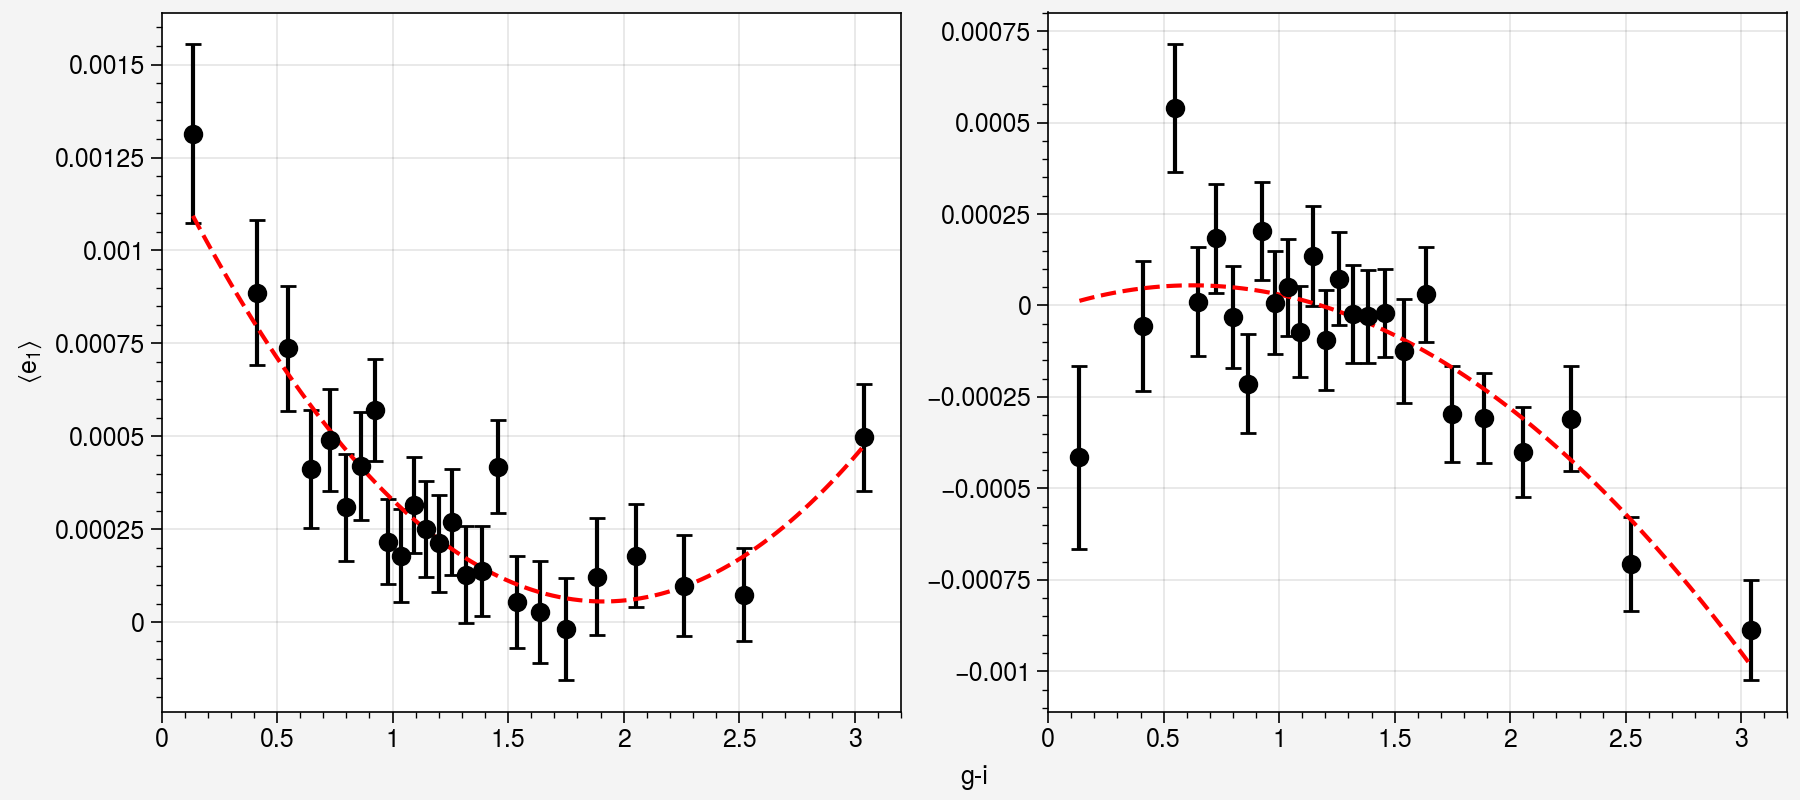

In [5]:
fig,ax = pplt.subplots(nrows=1, ncols=2, figsize=(9,4), sharey=False)
ax[0].errorbar(d_color['gmi']['bin_mean'], d_color['gmi']['g1'], yerr=d_color['gmi']['g1_cov'], fmt='o', c='k', ls='none')
x = np.linspace(d_color['gmi']['bin_mean'][0], d_color['gmi']['bin_mean'][-1], 100)
ax[0].plot(x, func(x, popt_e1[0], popt_e1[1], popt_e1[2]), c='r', ls='--')
ax[1].errorbar(d_color['gmi']['bin_mean'], d_color['gmi']['g2'], yerr=d_color['gmi']['g2_cov'], fmt='o', c='k', ls='none')
ax[1].plot(x, func(x, popt_e2[0], popt_e2[1], popt_e2[2]), c='r', ls='--')
ax[0].set_xlabel(r'g-i')
ax[0].set_xlim(0.0, 3.2)
ax[0].set_ylabel(r'$\langle e_1 \rangle$')
ax[1].set_xlim(0.0, 3.2)

In [6]:
d = fio.read('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/v2/metadetection_v2_shear_fluxes.fits')
def flux2mag(flux, zero_pt=30):
    return zero_pt - 2.5 * np.log10(flux)
gmi = flux2mag(d['g_flux']) - flux2mag(d['i_flux'])
# imz = flux2mag(d['i_flux']) - flux2mag(d['z_flux'])

In [4]:
d_corr = fio.read('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/v2/y6_shear2pt_gmicolor_trend.fits')
print(d_corr.dtype)

[('r_nom', '>f8'), ('meanr', '>f8'), ('meanlogr', '>f8'), ('xip', '>f8'), ('xim', '>f8'), ('xip_im', '>f8'), ('xim_im', '>f8'), ('sigma_xip', '>f8'), ('sigma_xim', '>f8'), ('weight', '>f8'), ('npairs', '>f8')]


Text(0, 0.5, '$\\xi_{-}$')

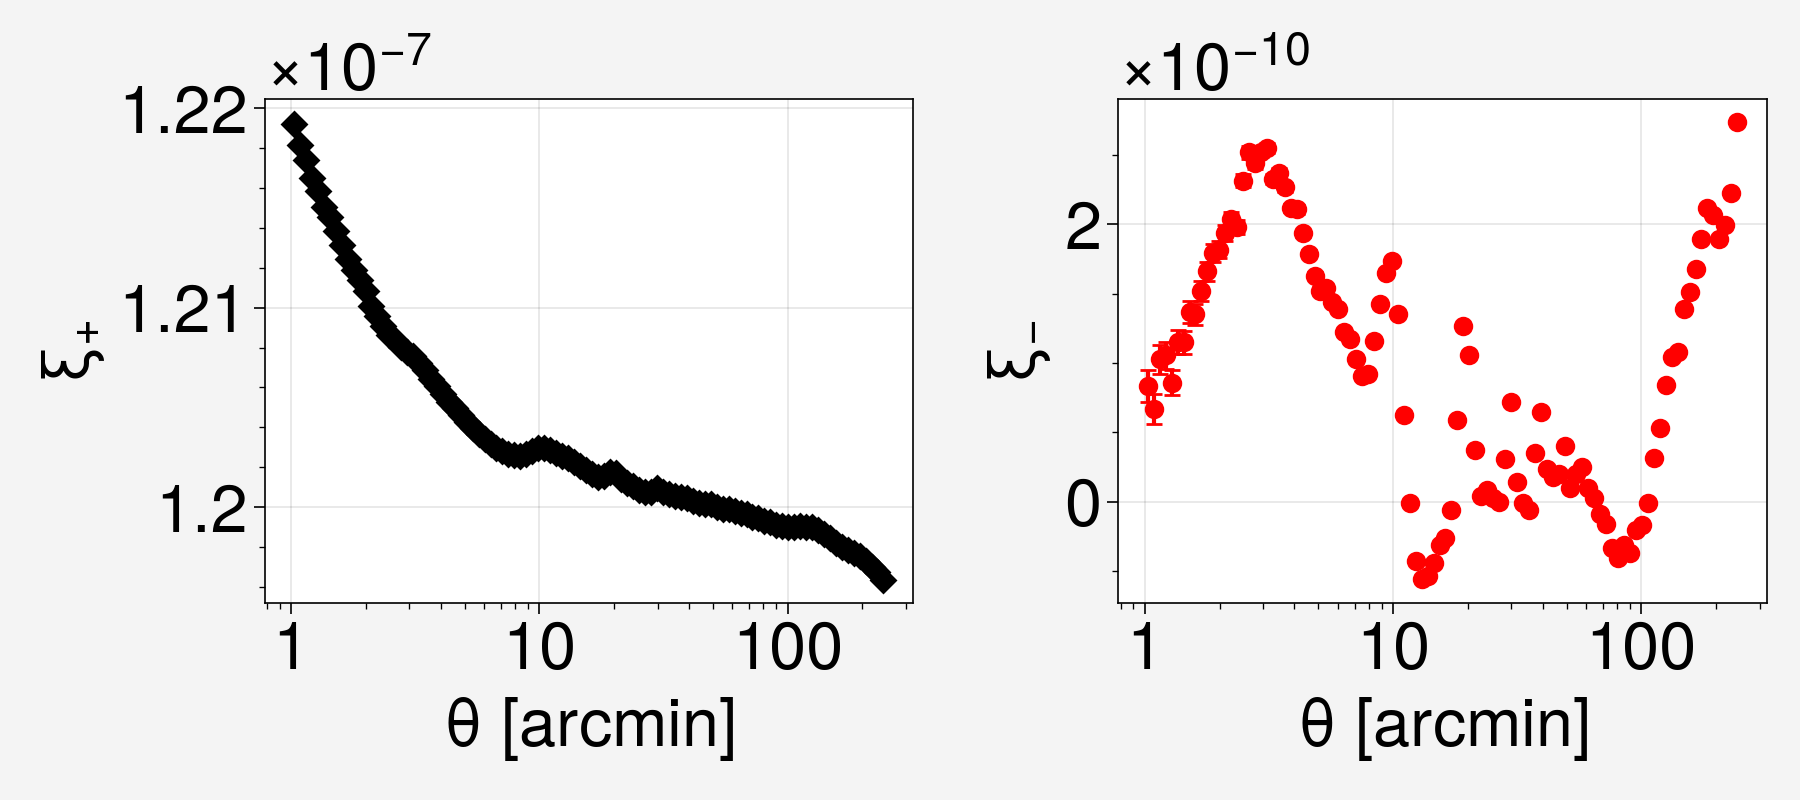

In [18]:
fig,ax=pplt.subplots(nrows=1, ncols=2, sharey=False, sharex=False, figsize=(9, 4))
matplotlib.rcParams.update({'font.size': 23})

ax[0].errorbar(d_corr['meanr'], d_corr['xip'], yerr=d_corr['sigma_xip'], c='k', fmt='D')
ax[1].errorbar(d_corr['meanr'], d_corr['xim'], yerr=d_corr['sigma_xim'], c='r', fmt='o')
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].set_xlabel(r'$\theta$ [arcmin]')
ax[1].set_xlabel(r'$\theta$ [arcmin]')
ax[0].set_ylabel(r'$\xi_{+}$')
ax[1].set_ylabel(r'$\xi_{-}$')

In [2]:
from scipy import interpolate 
d = fio.read('/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b/field_centers/gauss_field_centers_cross_correlation_final_output_bootstrap_bins0.01_min0.5_hdf5.fits')

In [3]:
d['meanr'][:25]

array([ 0.55950927,  0.68836672,  0.84657124,  1.04153879,  1.28111834,
        1.57605021,  1.93899755,  2.38533092,  2.93438952,  3.60949649,
        4.44055071,  5.4618528 ,  6.7196256 ,  8.26355688, 10.1676696 ,
       12.51274956, 15.38767277, 18.92844915, 23.28583095, 28.64517934,
       35.24159811, 43.34375427, 53.31738041, 65.6073701 , 80.71151386])

In [4]:
r = d['meanr']
ft = interpolate.Akima1DInterpolator(r, d['gamT'])#, kind='cubic', fill_value='extrapolate')
fx = interpolate.Akima1DInterpolator(r, d['gamX'])#, kind='cubic', fill_value='extrapolate')

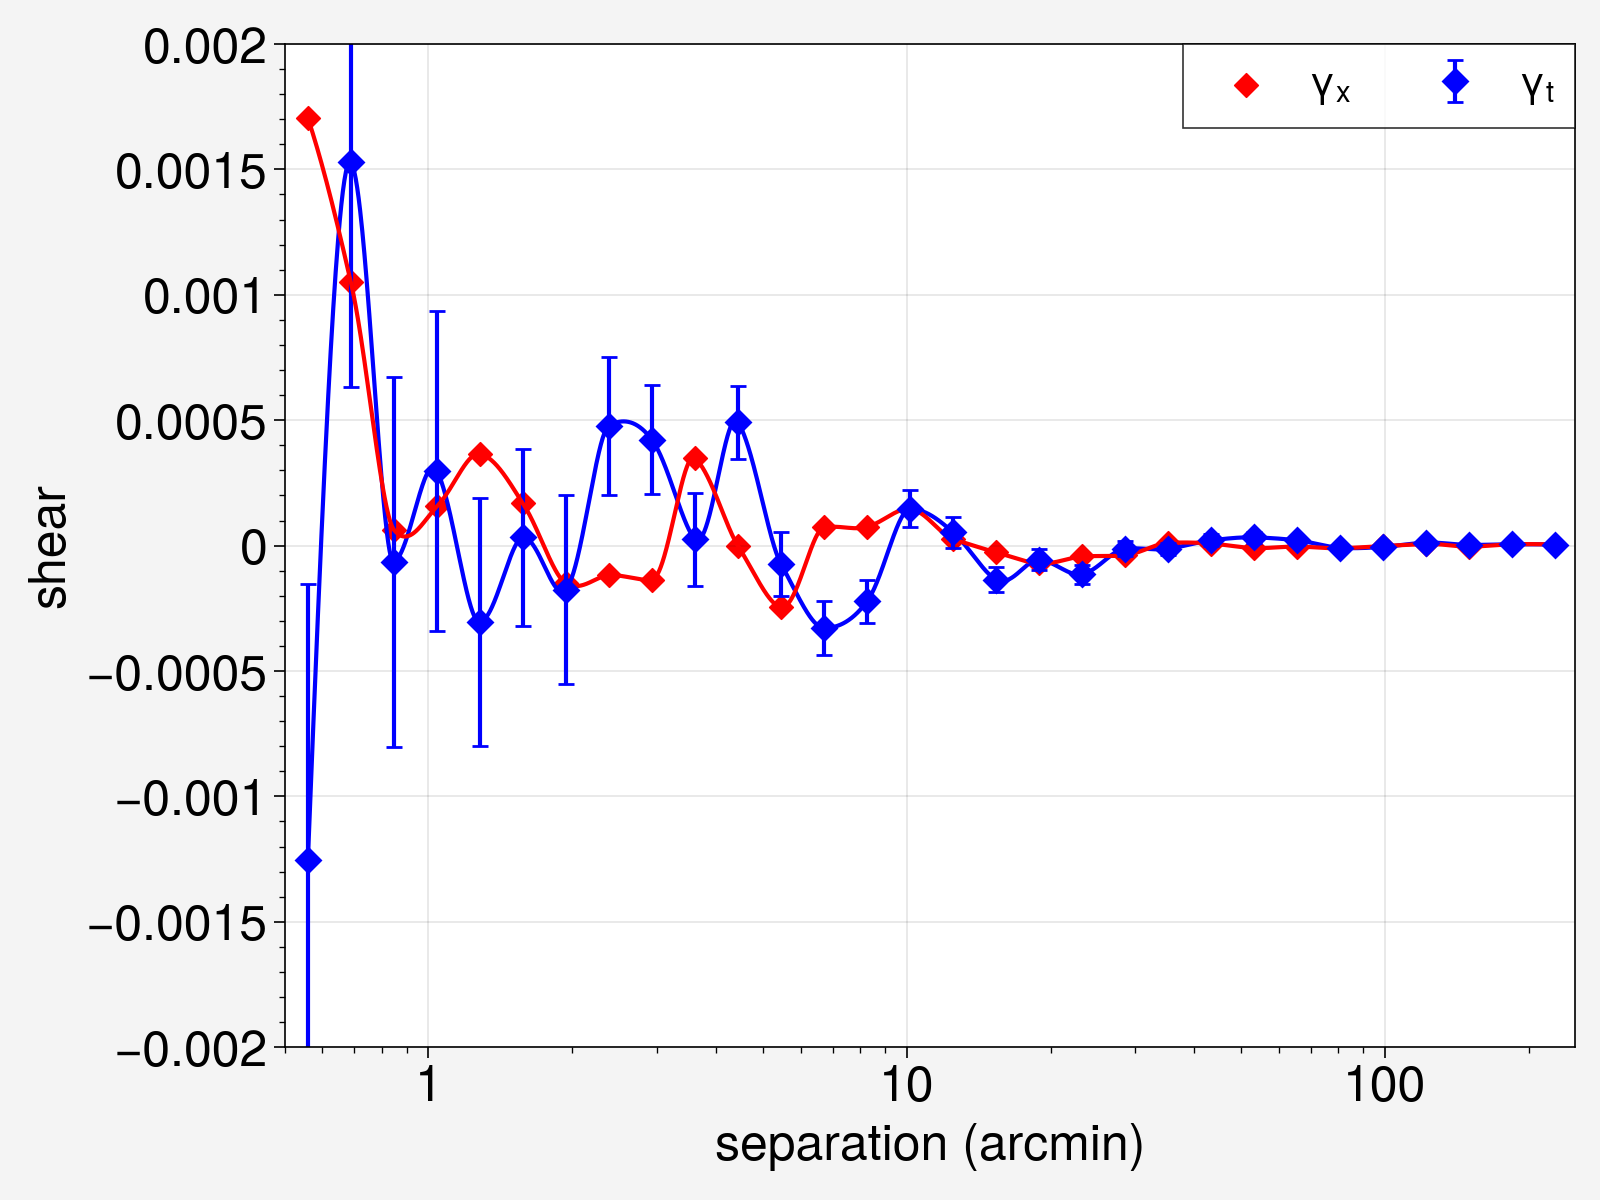

In [14]:
matplotlib.rcParams.update({'font.size':18, 'legend.fontsize':'small'})
fig,ax = pplt.subplots(figsize=(8,6))

x = np.linspace(0.5,250,100000)
ax.plot(x, ft(x), c='b')
ax.plot(x, fx(x), c='r')
ax.scatter(r, d['gamT'], marker='D', c='b')
ax.errorbar(r, d['gamT'], yerr=d['sigma'], fmt='D', c='b', label=r'$\gamma_t$')
ax.scatter(r, d['gamX'], marker='D', c='r', label=r'$\gamma_x$')
# ax.errorbar(r, d['gamX'], yerr=d['sigma'], fmt='D', c='r')
ax.set_xscale('log')
#ax.set_xlim(0, 4)
ax.set_ylim(-0.002, 0.002)
ax.set_xlabel('separation (arcmin)')
ax.set_ylabel('shear')
ax.legend()

In [96]:
ft(d['meanr'][0])

array(-0.00125421)